<a href="https://colab.research.google.com/github/nicolasbose/ReNOMO/blob/main/create_imb_parquet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd
import glob
import numpy as np

In [36]:
files = sorted(glob.glob('/content/imb/IMB*'))


In [138]:

df = pd.concat([pd.read_csv(file, sep=';') for file in files])
df.reset_index(inplace = True)

In [140]:
df['datetime'] = df['DT_LEITURA'] + ' ' + df['HR_LEITURA']

In [141]:
from datetime import datetime

# Convert string to datetime
datetime_object = []

for i in range(len(df)):
  datetime_object.append(datetime.strptime(df['datetime'][i], '%d/%m/%Y %H:%M:%S'))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [142]:
df['RAD'] = df['RAD'].str.replace(',', '.')
#df['RAD'] = df['RAD'].str.replace('######', np.nan)
df = df.apply(pd.to_numeric, errors='coerce')
df['RAD'] = df['RAD'].astype(float)

In [143]:
df['datetime'] = pd.to_datetime(datetime_object)


In [147]:
df.drop(['index', 'DT_LEITURA', 'HR_LEITURA'], axis=1, inplace=True)

In [150]:
df.index=df['datetime']

In [153]:
#df.to_parquet('imb_2023_mare.parquet')

<Axes: xlabel='datetime'>

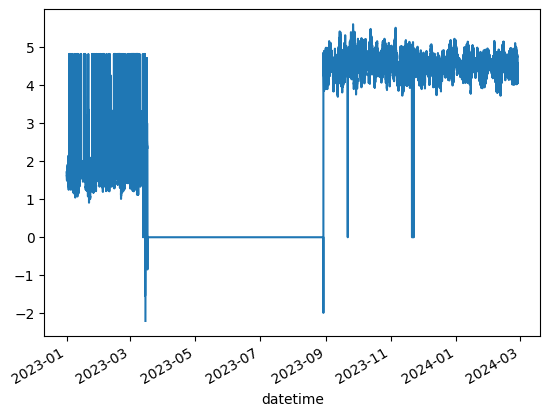

In [157]:
import matplotlib.pyplot as plt

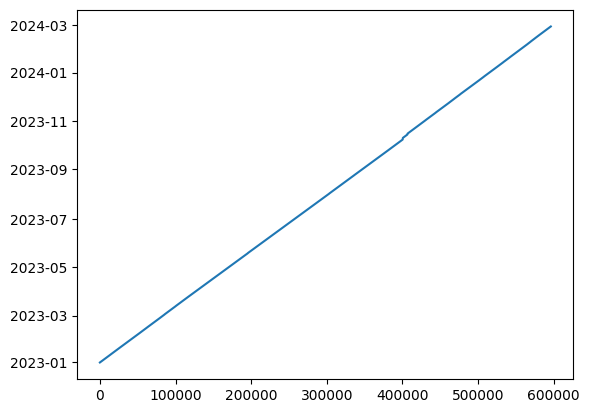

In [158]:
plt.plot(df.index)